In [1]:
#build a neural network to predict the magnitude of an Earthquake given the 'date', 'time', 'Latitude', and 'Longitude' as features
#Optimize at least 1 hyperparameter using Random Search
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('database.csv')
df = df[['Date','Time','Latitude','Longitude','Magnitude']]
df = df.dropna()
df.head(10)

,Date,Time,Latitude,Longitude,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,6.0
1,01/04/1965,11:29:49,1.863,127.352,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,5.8
4,01/09/1965,13:32:50,11.938,126.427,5.8
5,01/10/1965,13:36:32,-13.405,166.629,6.7
6,01/12/1965,13:32:25,27.357,87.867,5.9
7,01/15/1965,23:17:42,-13.309,166.212,6.0
8,01/16/1965,11:32:37,-56.452,-27.043,6.0
9,01/17/1965,10:43:17,-24.563,178.487,5.8


In [3]:
# Masage the Date column to get it into days since beginning of data
df.Date = pd.to_datetime(df['Date'])
df.Date = df['Date'].values.astype('datetime64[D]')
df.Date = df.Date - df.Date.min()
df.Date = df.Date.values / np.timedelta64(1, 'D')
df.Date = df.Date.values.astype('int')

In [4]:
df.head(10)

,Date,Time,Latitude,Longitude,Magnitude
0,0,13:44:18,19.246,145.616,6.0
1,2,11:29:49,1.863,127.352,5.8
2,3,18:05:58,-20.579,-173.972,6.2
3,6,18:49:43,-59.076,-23.557,5.8
4,7,13:32:50,11.938,126.427,5.8
5,8,13:36:32,-13.405,166.629,6.7
6,10,13:32:25,27.357,87.867,5.9
7,13,23:17:42,-13.309,166.212,6.0
8,14,11:32:37,-56.452,-27.043,6.0
9,15,10:43:17,-24.563,178.487,5.8


In [5]:
# Masage the Time column to get it in seconds since 00:00:00
import datetime
df.Time = pd.to_datetime(df['Time'])
now = datetime.datetime.now()
midnight = now.replace(hour=0, minute=0, second=0, microsecond=0)
df.Time = df.Time - midnight
df.Time = df.Time.values / np.timedelta64(1, 's')
df.Time = df.Time.values.astype('int')
df.head(10)

,Date,Time,Latitude,Longitude,Magnitude
0,0,49458,19.246,145.616,6.0
1,2,41389,1.863,127.352,5.8
2,3,65158,-20.579,-173.972,6.2
3,6,67783,-59.076,-23.557,5.8
4,7,48770,11.938,126.427,5.8
5,8,48992,-13.405,166.629,6.7
6,10,48745,27.357,87.867,5.9
7,13,83862,-13.309,166.212,6.0
8,14,41557,-56.452,-27.043,6.0
9,15,38597,-24.563,178.487,5.8


In [6]:
def normalize(column):
    min = column.min()
    max = column.max()
    column = (column - min)/(max - min)
    return column

In [7]:
df.Date = normalize(df.Date)
df.Time = normalize(df.Time)
df.Latitude = normalize(df.Latitude)
df.Longitude = normalize(df.Longitude)
df['NormMagnitude'] = normalize(df.Magnitude)
df['Bias'] = 1
df.head(10)


,Date,Time,Latitude,Longitude,Magnitude,NormMagnitude,Bias
0,0.000000,0.999973,0.590649,0.904493,6.0,0.138889,1
1,0.000105,0.999967,0.484060,0.853759,5.8,0.083333,1
2,0.000158,0.999984,0.346451,0.016736,6.2,0.194444,1
3,0.000316,0.999986,0.110396,0.434562,5.8,0.083333,1
4,0.000369,0.999972,0.545838,0.851190,5.8,0.083333,1
5,0.000421,0.999972,0.390441,0.962863,6.7,0.333333,1
6,0.000527,0.999972,0.640384,0.744077,5.9,0.111111,1
7,0.000685,0.999998,0.391029,0.961705,6.0,0.138889,1
8,0.000737,0.999967,0.126486,0.424878,6.0,0.138889,1
9,0.000790,0.999964,0.322022,0.995803,5.8,0.083333,1


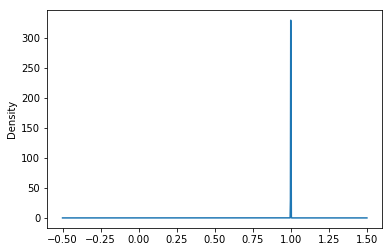

In [8]:
#Visualizations¶
#Time of the Day
df['Time'].plot.kde()
plt.show()


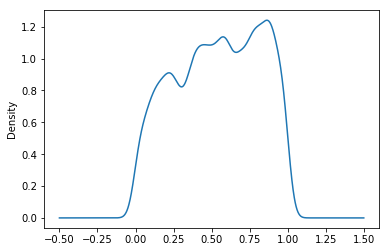

In [9]:
df['Date'].plot.kde()
plt.show()

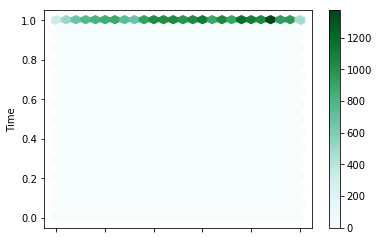

In [10]:
#hexbin plot where the x axis is the the date and the y axis is the normalized time of day.

df.plot.hexbin(x='Date', y='Time', gridsize=25)
plt.show()

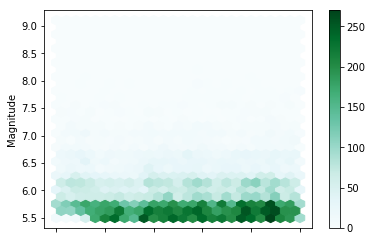

In [11]:
#Below we look at a hexbin plot of dates compared to the magnitude of reported earthquakes.
df.plot.hexbin(x='Date', y='Magnitude', gridsize=25)
plt.show()

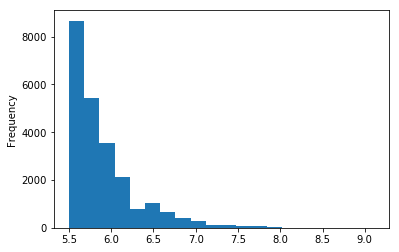

In [12]:
#Below is a histogram of the frequency of magnitudes.
df.Magnitude.plot.hist(stacked=True, bins=20)
plt.show()
#We can see a strong affinity for smaller earthquakes, which is good news :)


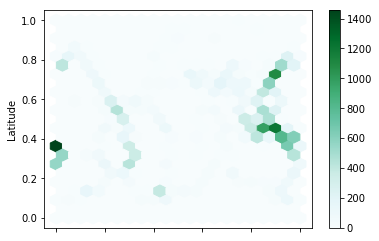

In [13]:
#We all know that certain areas of the world experience a much higher frequency of earthquakes than the majority of the world
df.plot.hexbin(x='Longitude', y='Latitude', gridsize=20)
plt.show()

In [14]:
train, test = train_test_split(df, test_size = 0.2)
x = train.as_matrix(['Date', 'Time', 'Latitude', 'Longitude', 'Bias'])
print(x)
y = train.as_matrix(['NormMagnitude'])
print(y)

[[ 0.91174302  0.99995448  0.74765306  0.53079348  1.        ]
 [ 0.81263823  0.9999892   0.36698654  0.68552897  1.        ]
 [ 0.05313323  0.9999843   0.43815802  0.92794067  1.        ]
 ..., 
 [ 0.59489205  0.99998918  0.74691112  0.91758219  1.        ]
 [ 0.11258557  0.99997267  0.27667781  0.0051334   1.        ]
 [ 0.98609795  0.99994174  0.44719686  0.783922    1.        ]]
[[ 0.08333333]
 [ 0.11111111]
 [ 0.11111111]
 ..., 
 [ 0.        ]
 [ 0.02777778]
 [ 0.05555556]]


In [15]:
# Step2: Build Model
num_epochs = 60000
#initialize weights
# This is for input node : size is 5*7 and weight value is -1<w<1
syn0 = 2*np.random.random((5,7)) 
#This is from hidden node to output node : size needs to be 7*1 and weeight needs to be -1<w<1
syn1 = 2*np.random.random((7,1)) 

In [16]:
print(syn0)

[[ 0.25470503  0.23660962  1.42308116  0.60460085  1.40418492  1.16241189
   0.12969676]
 [ 0.48461831  0.77527149  0.7314384   0.21124606  0.81542671  1.09447572
   1.96452182]
 [ 0.52117905  1.87416087  1.50034462  1.16666124  1.92024759  1.57742506
   1.11794776]
 [ 1.16718153  1.06041292  1.61891987  0.89733461  1.62263872  0.85282923
   0.7448353 ]
 [ 0.67823709  1.05098723  1.83480082  1.26864612  0.78087921  0.68062211
   0.76190526]]


In [17]:
#Sigmoid function for activation function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))

In [18]:
print(syn1)

[[ 0.33525258]
 [ 0.77600143]
 [-0.90666773]
 [-0.15947321]
 [-0.73378475]
 [ 0.38942705]
 [-0.25533385]]


In [ ]:
#Step 3 Train Model
for j in range(num_epochs):
    #feed forward through layers 0,1, and 2
    k0 = x
    k1 = nonlin(np.dot(k0, syn0))
    k2 = nonlin(np.dot(k1, syn1))
    #how much did we miss the target value?
    k2_error = y - k2
    
    if (j% 10000) == 0:
        print( "Error:" + str(np.mean(np.abs(k2_error))))
    
    #in what direction is the target value?
    k2_delta = k2_error*nonlin(k2, deriv=True)
    
    #how much did each k1 value contribute to k2 error
    #backpropogation- update weight value
    k1_error = k2_delta.dot(syn1.T)
    
    #in what direction is the target value?
    k1_delta= k1_error * nonlin(k1,deriv=True)
    
    
    syn1 += k1.T.dot(k2_delta)
    syn0 += k0.T.dot(k1_delta)

Error:0.255214683845


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
